# pyLatt examples

Some examples just for demo/remind purpose

In [1]:
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
plt.style.use(['bmh'])#dark_background'])

import pylatt as latt
reload(latt)

<module 'pylatt' from 'pylatt.pyc'>

## elements and beamlines

In [2]:
import inspect
print([m[0] for m in inspect.getmembers(latt, inspect.isclass) if m[1].__module__=='pylatt'])

['aper', 'beamline', 'bend', 'cell', 'drif', 'kick', 'kmap', 'matr', 'moni', 'octu', 'quad', 'rfca', 'sext', 'wigg']


## element definition and usage

In [3]:
# --- define a drift
d01 = latt.drif('d01',L=1.0)
print(d01)
print('\ncoordinate transport matrix:')
latt.printmatrix(d01.tm,format='%5g')
print('\nTwiss transport matrix in x plane:')
latt.printmatrix(d01.tx,format='%5g')

d01: drif,L=1

coordinate transport matrix:
    1      1      0      0      0      0  
    0      1      0      0      0      0  
    0      0      1      1      0      0  
    0      0      0      1      0      0  
    0      0      0      0      1      0  
    0      0      0      0      0      1  

Twiss transport matrix in x plane:
    1     -2      1  
   -0      1     -1  
    0     -0      1  


In [4]:
# --- update the drift length, its associated info/matrices will be updated auto
d01.L = 2
print(d01)
print('\ncoordinate transport matrix:')
latt.printmatrix(d01.tm,format='%5g')
print('\nTwiss transport matrix in x plane:')
latt.printmatrix(d01.tx,format='%5g')

d01: drif,L=2

coordinate transport matrix:
    1      2      0      0      0      0  
    0      1      0      0      0      0  
    0      0      1      2      0      0  
    0      0      0      1      0      0  
    0      0      0      0      1      0  
    0      0      0      0      0      1  

Twiss transport matrix in x plane:
    1     -4      4  
   -0      1     -2  
    0     -0      1  


In [5]:
# --- quad
q01 = latt.quad('q01',L=0.25,K1=2.0)
print(q01)
print('\ncoordinate transport matrix:')
latt.printmatrix(q01.tm,format='%12f')
print('\nTwiss transport matrix in x plane:')
latt.printmatrix(q01.tx,format='%10f')

q01: quad,L=0.25,K1=2,tilt=0

coordinate transport matrix:
    0.938148      0.244824      0.000000      0.000000      0.000000      0.000000  
   -0.489648      0.938148      0.000000      0.000000      0.000000      0.000000  
    0.000000      0.000000      1.063154      0.255241      0.000000      0.000000  
    0.000000      0.000000      0.510482      1.063154      0.000000      0.000000  
    0.000000      0.000000      0.000000      0.000000      1.000000      0.000000  
    0.000000      0.000000      0.000000      0.000000      0.000000      1.000000  

Twiss transport matrix in x plane:
  0.880122   -0.459363    0.059939  
  0.459363    0.760245   -0.229681  
  0.239755    0.918725    0.880122  


In [6]:
# --- create or modify quad to skew
q01.tilt = np.pi/4
print(q01)
print('\ncoordinate transport matrix:')
latt.printmatrix(q01.tm,format='%12f')
print('\nTwiss transport matrix in x plane:')
latt.printmatrix(q01.tx,format='%10f')

q01: quad,L=0.25,K1=2,tilt=0.785398

coordinate transport matrix:
    1.000651      0.250033     -0.062503     -0.005208      0.000000      0.000000  
    0.010417      1.000651     -0.500065     -0.062503      0.000000      0.000000  
   -0.062503     -0.005208      1.000651      0.250033      0.000000      0.000000  
   -0.500065     -0.062503      0.010417      1.000651      0.000000      0.000000  
    0.000000      0.000000      0.000000      0.000000      1.000000      0.000000  
    0.000000      0.000000      0.000000      0.000000      0.000000      1.000000  

Twiss transport matrix in x plane:
  1.001303   -0.500391    0.062516  
 -0.010424    1.005209   -0.250195  
  0.000109   -0.020847    1.001303  


In [7]:
# --- ID used radia kickmap model
ivu20km = latt.kmap("ivu20km",L=1.5,kmap1fn=None,kmap2fn="/Users/yli/Dropbox/Li_Yongjun/pylatt-dev/kickmap/U20_ASBUILT_G52.txt",E=3.0)
print(ivu20km)
print('\ncoordinate transport matrix:')
latt.printmatrix(ivu20km.tm,format='%12g')
print('\nTwiss transport matrix in x plane:')
latt.printmatrix(ivu20km.tx,format='%15e')

ivu20km: kmap, L = 1.5, E =  3.0000, kmap1fn = 'None', kmap2fn = '/Users/yli/Dropbox/Li_Yongjun/pylatt-dev/kickmap/U20_ASBUILT_G52.txt'

coordinate transport matrix:
           1           1.5             0             0             0             0  
 1.29241e-06             1             0             0             0             0  
           0             0      0.994121       1.49692             0             0  
           0             0   -0.00783144       0.99412             0             0  
           0             0             0             0             1             0  
           0             0             0             0             0             1  

Twiss transport matrix in x plane:
   1.000002e+00    -3.000004e+00     2.250002e+00  
  -1.292412e-06     1.000004e+00    -1.500002e+00  
   1.670324e-12    -2.584823e-06     1.000002e+00  


## particle tracking through a element using symplectic kick and drift

In [8]:
b = latt.bend('b',L=1,K1=0.5,angle=0.02,e1=0.1,e2=0.1,nkick=20)

# --- single particle, using one row or one column
print('single particle in col format')
x0 = [0.001,0.0003,-0.001,-0.004,0,0.01]
print(b.sympass4(x0,fast=0))
print

print('single particle in row format')
print(b.sympass4(x0,fast=1))
print

# --- multiple particles, using multipole columns
print('multi-particles in col format')
x0 = np.array([[0.001,0.0003,-0.001,-0.004,0,0.01],[0.002,0.0001,-0.002,-0.003,0,-0.01],[-0.001,-0.0003,0.001,0.004,0,0.005]]).transpose()
print(b.sympass4(x0,fast=1))
print

# --- compare with matrix
print('matrix transport')
print(b.tm.dot(x0))

single particle in col format
[[  1.13595366e-03]
 [ -3.91400119e-05]
 [ -5.59402854e-03]
 [ -5.55479285e-03]
 [  3.26084100e-05]
 [  1.00000000e-02]]

single particle in row format
[  1.13595366e-03  -3.91400119e-05  -5.59402854e-03  -5.55479285e-03
   3.26084100e-05   1.00000000e-02]

multi-particles in col format
[[  1.13595366e-03   1.51509582e-03  -9.90805411e-04]
 [ -3.91400119e-05  -1.02958398e-03   3.17638205e-04]
 [ -5.59402854e-03  -5.78128715e-03   5.59708846e-03]
 [ -5.55479285e-03  -4.87062946e-03   5.56301333e-03]
 [  3.26084100e-05   4.45276718e-05  -1.02602255e-05]
 [  1.00000000e-02  -1.00000000e-02   5.00000000e-03]]

matrix transport
[[  1.13340186e-03   1.51977592e-03  -9.89553456e-04]
 [ -4.41482017e-05  -1.02102308e-03   3.20035455e-04]
 [ -5.60018025e-03  -5.77315230e-03   5.60018025e-03]
 [ -5.57132070e-03  -4.85057296e-03   5.57132070e-03]
 [  2.19196357e-05   3.70937725e-05  -2.09443597e-05]
 [  1.00000000e-02  -1.00000000e-02   5.00000000e-03]]


## a beamline with initial condition

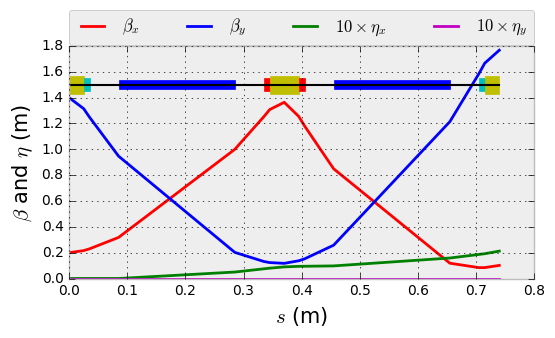


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  2.000e-01  0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.400e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  7.400e-01  1.014e-01 -6.147e-01  3.924e-01  2.119e-02  1.058e-01  1.767e+00  1.520e-01  3.335e-01  0.000e+00  0.000e+00

Tune: nux =       0.392, nuy =       0.334




In [9]:
reload(latt)
d1 = latt.drif('d1',L=0.05)
b1 = latt.bend('b1',L=0.2,angle=0.05,e1=0.025,e2=0.025)
qf = latt.quad('qf',L=0.025,K1=100)
qd = latt.quad('qd',L=0.025,K1=-100)
sf = latt.sext('sf',L=0.01,K2=5)
od = latt.octu('od',L=0.01,K3=-15)

bl = [qd,od,d1,b1,d1,sf,qf,qf,sf,d1,b1,d1,od,qd]
line = latt.beamline(bl,betax0=0.2,betay0=1.4)
line.plttwiss(figsize=(6,3),surflvl=1.5)
print(line)

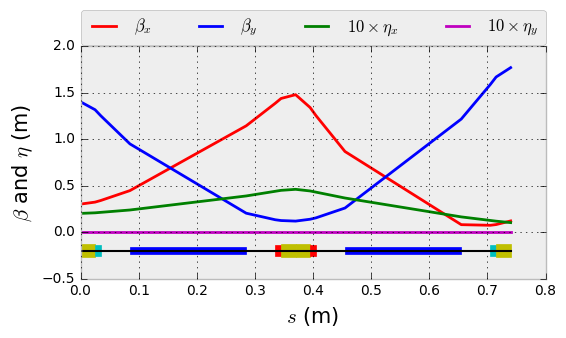

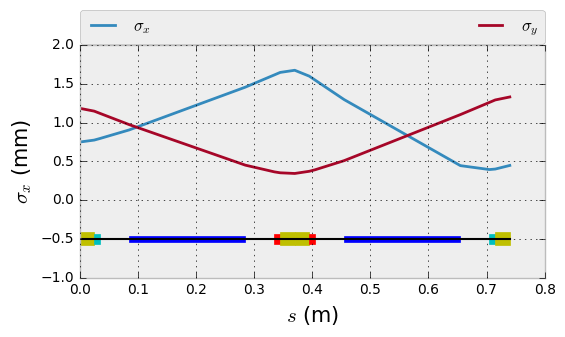


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  3.000e-01  0.000e+00  0.000e+00  2.000e-02  0.000e+00  1.400e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  7.400e-01  1.190e-01 -1.128e+00  4.218e-01  1.009e-02 -4.947e-02  1.767e+00  1.520e-01  3.335e-01  0.000e+00  0.000e+00

Tune: nux =       0.422, nuy =       0.334




In [10]:
line.betax0 = 0.3
line.etax0 = 0.02
#line.bl = line.bl
line.plttwiss(figsize=(6,3),surflvl=-0.2)
line.pltsigma(figsize=(6,3),surflvl=-0.5)
print(line)

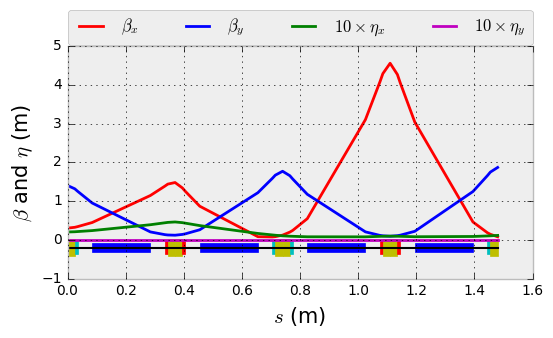

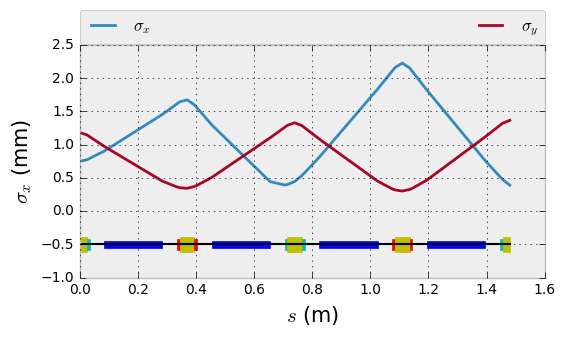


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  3.000e-01  0.000e+00  0.000e+00  2.000e-02  0.000e+00  1.400e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.480e+00  7.668e-02  8.645e-01  6.131e-01  1.118e-02  5.495e-02  1.866e+00 -1.112e-01  6.987e-01  0.000e+00  0.000e+00

Tune: nux =       0.613, nuy =       0.699




In [11]:
line.betax0 = 0.3
line.etax0 = 0.02
line.bl = line.bl*2
line.plttwiss(figsize=(6,3),surflvl=-0.2)
line.pltsigma(figsize=(6,3),surflvl=-0.5)
print(line)

In [12]:
attrs = line.__dict__.keys()
attrs.sort()
print attrs

['_E', '_L', '_alfax', '_alfax0', '_alfay', '_alfay0', '_betax', '_betax0', '_betay', '_betay0', '_bl', '_dxy', '_emitx', '_emity', '_etax', '_etax0', '_etaxp', '_etaxp0', '_etay', '_etay0', '_etayp', '_etayp0', '_gamax', '_gamay', '_mux', '_muy', '_nux', '_nuy', '_s', '_sige', '_sigx', '_sigy', '_twx', '_twy']


In [13]:
print(line.getElements('quad',unique=True))
print('')
print(line.getElements('quad',unique=False))

[qd: quad,L=0.025,K1=-100,tilt=0, qf: quad,L=0.025,K1=100,tilt=0]

[qd: quad,L=0.025,K1=-100,tilt=0, qf: quad,L=0.025,K1=100,tilt=0, qf: quad,L=0.025,K1=100,tilt=0, qd: quad,L=0.025,K1=-100,tilt=0, qd: quad,L=0.025,K1=-100,tilt=0, qf: quad,L=0.025,K1=100,tilt=0, qf: quad,L=0.025,K1=100,tilt=0, qd: quad,L=0.025,K1=-100,tilt=0]


In [14]:
print line.getSIndex(0.4)

(8, 9)


In [15]:
line.getIndex(['quad','drif'])

[0, 2, 4, 6, 7, 9, 11, 13, 14, 16, 18, 20, 21, 23, 25, 27]

In [16]:
print(line.getIndex('quad'))
line.getElements('quad','qf')

[0, 6, 7, 13, 14, 20, 21, 27]


[qf: quad,L=0.025,K1=100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0,
 qf: quad,L=0.025,K1=100,tilt=0]

In [17]:
line.savefile('savefile.py',comment="whatever it is")
!cat savefile.py 

# --- comments:
# --- whatever it is

import pylatt as latt

# === Element definition:
b1 = latt.bend("b1",L=0.2,angle=0.05,e1=0.025,e2=0.025,K1=0.0,K2=0.0,hgap=0.0,fint=0.5)
d1 = latt.drif("d1",L=0.05)
od = latt.octu("od",L=0.01,K3=-15.0)
qd = latt.quad("qd",L=0.025,K1=-100.0,tilt=0.0)
qf = latt.quad("qf",L=0.025,K1=100.0,tilt=0.0)
sf = latt.sext("sf",L=0.01,K2=5.0)

# === Beam Line sequence:
BL = [qd, od, d1, b1, d1, sf, qf, qf, sf, d1, b1, d1, od, qd, qd, od, d1, 
   b1, d1, sf, qf, qf, sf, d1, b1, d1, od, qd]
ring = latt.cell(BL)


In [18]:
line.saveLte('saveLte.lte')
!cat saveLte.lte

! === Convert from Yongjun Li's pylatt input 
! === Caution: some elements need to be adjusted manually

! === Element definition:
b1: csbend, L=0.2, angle=0.05, e1=0.025, e2=0.025
d1: drif,L=0.05
od: koct, L = 0.01, K3 =    -15.00000000
qd: kquad,L=0.025,K1=-100,tilt=0
qf: kquad,L=0.025,K1=100,tilt=0
sf: ksext, L = 0.01, K2 =      5.00000000

! === Beam line sequence:
ring: LINE = (qd, od, d1, b1, d1, sf, qf, qf, sf, &
  d1, b1, d1, od, qd, qd, od, d1, b1, d1, sf, qf, qf, sf, d1, b1, d1, od, &
  qd)

use, ring
return


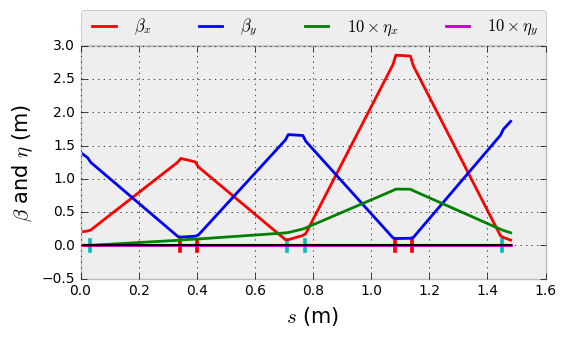


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  2.000e-01  0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.400e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  1.480e+00  7.833e-02  4.710e-01  6.451e-01  1.885e-02 -1.175e-01  1.866e+00 -1.112e-01  6.987e-01  0.000e+00  0.000e+00

Tune: nux =       0.645, nuy =       0.699




In [19]:
alist = line.getMatLine()
bline = latt.beamline(alist,betax0=0.2,betay0=1.4,etax0=0)
bline.plttwiss(figsize=(6,3))
print(bline)

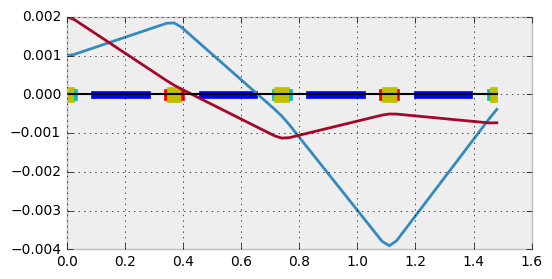

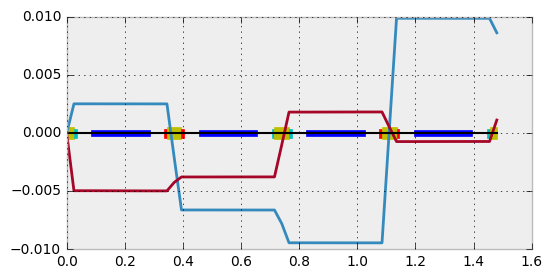

array([ -3.84549618e-04,   8.63917074e-03,  -7.30620159e-04,
         1.12995634e-03,  -6.91175641e-05,  -1.00000000e-04])

In [20]:
x = line.eletrack(x0=[0.001,0,0.002,0,0,-0.0001])
plt.figure(figsize=(6,3))
plt.plot(line.s,x[:,0,0])
plt.plot(line.s,x[:,2,0])
line.pltmag(unit=0.0002)
plt.show()
plt.figure(figsize=(6,3))
plt.plot(line.s,x[:,1,0])
plt.plot(line.s,x[:,3,0])
line.pltmag(unit=0.0005)
plt.show()

x[-1,:,0]

In [21]:
R = line.getTransMat()
latt.printmatrix(R)
R.dot([0.001,0,0.002,0,0,-0.0001])

-0.383110  -0.098968   0.000000   0.000000   0.000000   0.018847  
 8.621231  -0.383110   0.000000   0.000000   0.000000  -0.117478  
 0.000000   0.000000  -0.366034  -1.532845   0.000000   0.000000  
 0.000000   0.000000   0.564975  -0.366034   0.000000   0.000000  
-0.117478   0.018847   0.000000   0.000000   1.000000   0.005847  
 0.000000   0.000000   0.000000   0.000000   0.000000   1.000000  


array([-0.00038499,  0.00863298, -0.00073207,  0.00112995, -0.00011806,
       -0.0001    ])

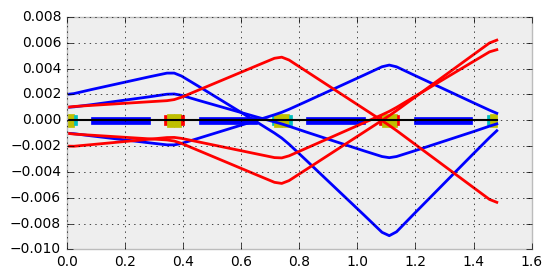

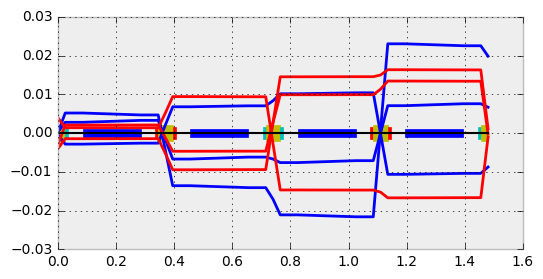

In [22]:
x0 = np.array([[0.001,0.0003,-0.001,-0.004,0,0.01],[0.002,0.0001,-0.002,-0.003,0,-0.01],[-0.001,-0.0003,0.001,0.004,0,0.005]]).transpose()
x = line.eletrack(x0,fast=1)
plt.figure(figsize=(6,3))
plt.plot(line.s,x[:,0,:],'b')
plt.plot(line.s,x[:,2,:],'r')
line.pltmag(unit=0.0005)
plt.show()
plt.figure(figsize=(6,3))
plt.plot(line.s,x[:,1,:],'b')
plt.plot(line.s,x[:,3,:],'r')
line.pltmag(unit=0.002)
plt.show()


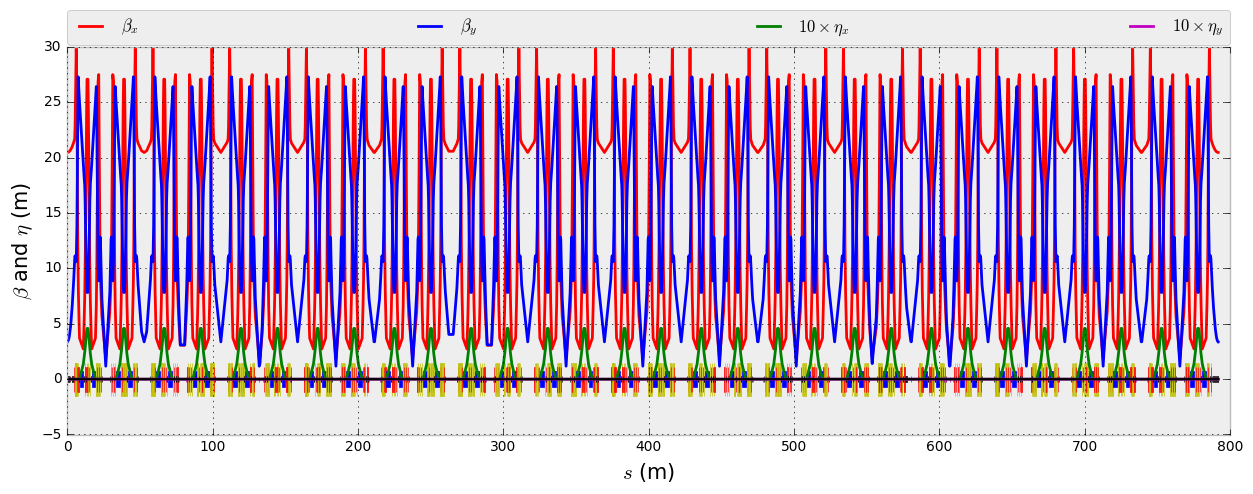

3871



-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  2.048e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00  3.367e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  7.920e+02  2.048e+01  1.136e-13  3.322e+01 -1.984e-04 -1.162e-05  3.367e+00  1.553e-13  1.626e+01  0.000e+00  0.000e+00

Tune: nux =      33.221, nuy =      16.260


In [23]:
reload(latt)
import nsls2sr_bare_20141015 as nsls2
nsls2.ring.betax0 = 20.475221539042554
nsls2.ring.betay0 = 3.367063035864382
nsls2.ring.plttwiss()
print(len(nsls2.ring.bl))
nsls2.ring

In [24]:
reload(nsls2)
aring = latt.beamline(nsls2.ring.cmbdrf(),betax0 = 20.475221539042554,betay0 = 3.367063035864382)
print(len(aring.bl))
aring

2469



-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  2.048e+01  0.000e+00  0.000e+00  0.000e+00  0.000e+00  3.367e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  7.920e+02  2.048e+01 -1.932e-13  3.322e+01 -1.984e-04 -1.162e-05  3.367e+00  5.670e-14  1.626e+01  0.000e+00  0.000e+00

Tune: nux =      33.221, nuy =      16.260


## a periodical line

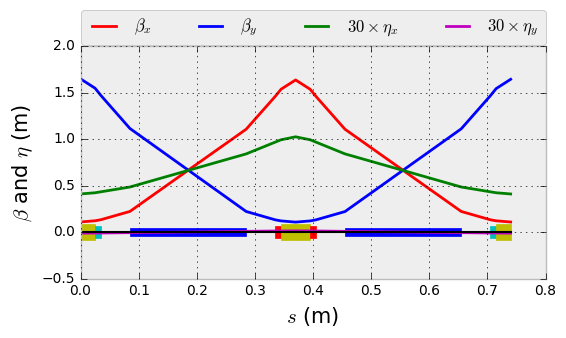


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  1.078e-01  6.675e-17  0.000e+00  1.363e-02  3.988e-16  1.647e+00  3.358e-16  0.000e+00 -4.093e-04  3.524e-19
  7.400e-01  1.075e-01 -1.547e-03  3.433e-01  1.363e-02  4.649e-16  1.642e+00 -1.917e-03  3.448e-01 -4.093e-04  8.674e-19

Tune: nux =       0.343, nuy =       0.345

Horizontal emittance [nm.rad] =   3.703e+00

Momentum compactor alphac =   2.869e-03

Radiation damping factor: D =  -2.084e-04

Radiation damping partition factors: Jx =   1.000e+00, Jy =   1.000e+00, Je =   2.000e+00

Radiation damping time [ms]: taux =   5.194e-01, tauy =   5.195e-01, taue =   2.598e-01

Radiation loss per turn U0 [keV] = 

In [25]:
reload(latt)
d1 = latt.drif('d1',L=0.05)
b1 = latt.bend('b1',L=0.2,angle=0.05,e1=0.025,e2=0.025)
qf = latt.quad('qf',L=0.025,K1=100,tilt=20e-3)
qd = latt.quad('qd',L=0.025,K1=-100,tilt=20e-3)
sf = latt.sext('sf',L=0.01,K2=5)
od = latt.octu('od',L=0.01,K3=-15)
bl = [qd,od,d1,b1,d1,sf,qf,qf,sf,d1,b1,d1,od,qd]
acell = latt.cell(bl)
acell.plttwiss(figsize=(6,3),etaxfactor=30,etayfactor=30,surflvl=-0.)
acell.rad()
acell

-0.555377   0.089610   0.000130  -0.025480   0.000000   0.021207  
-7.758697  -0.555377  -0.145124  -0.000191   0.000000   0.105729  
-0.000191  -0.025480  -0.563014   1.360779   0.000000  -0.000637  
-0.145124   0.000130  -0.504647  -0.563014   0.000000   0.001772  
 0.105729   0.021207   0.001772  -0.000637   1.000000   0.000682  
 0.000000   0.000000   0.000000   0.000000   0.000000   1.000000  


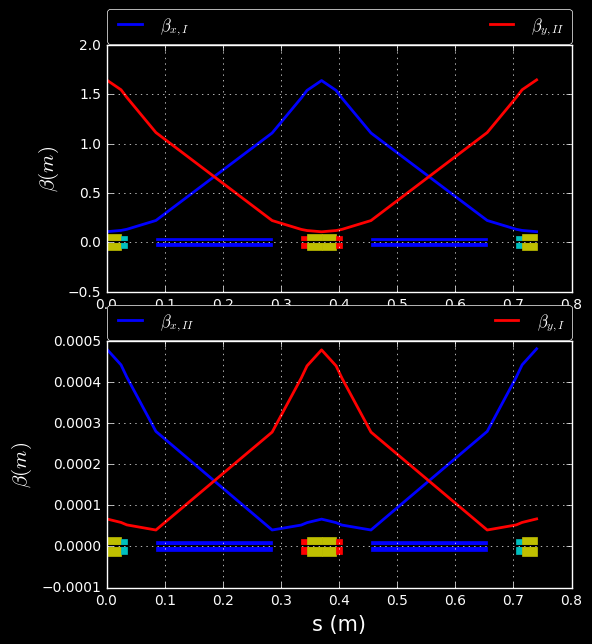

In [35]:
latt.printmatrix(acell.R)
acell.coupledTwiss()
acell.pltcoupledtwiss(figsize=(6,7))

In [27]:
acell.coupledemit()
print("emit_I  = %.4e\nemit_II  = %.4e"%(acell.emit_I,acell.emit_II))

emit_I  = 3.7340e+00
emit_II  = 2.0908e-02


In [28]:
acell.emit_II/acell.emit_I*100

0.55991913091039458

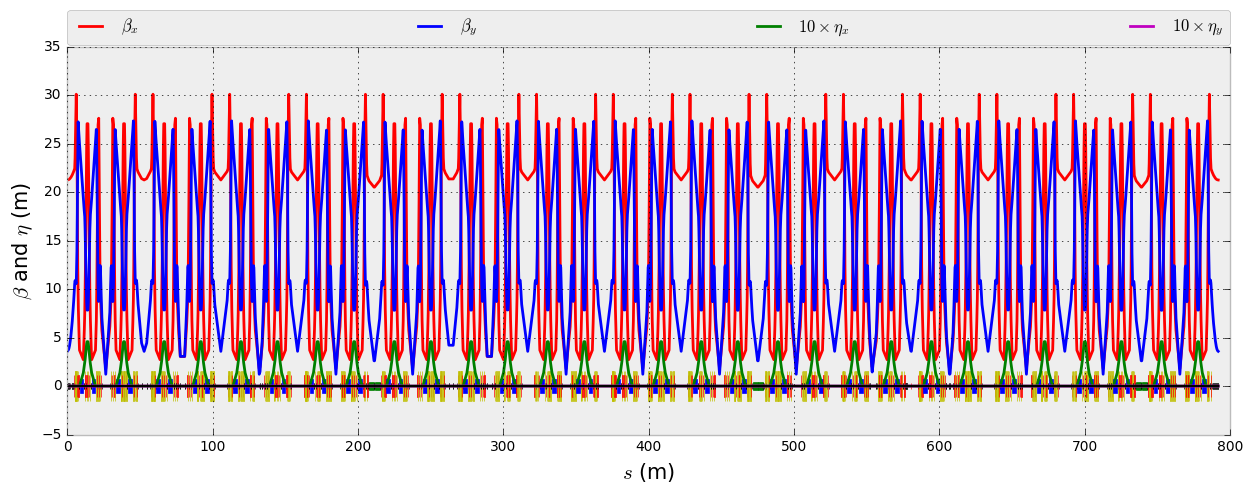


-------------------------------------------------------------------------------------------------------------------------
          s      betax      alfax        mux       etax      etaxp      betay      alfay        muy       etay      etayp
-------------------------------------------------------------------------------------------------------------------------
  0.000e+00  2.127e+01  4.961e-05  0.000e+00 -2.410e-04 -3.857e-07  3.589e+00  2.327e-03  0.000e+00 -0.000e+00 -0.000e+00
  7.920e+02  2.127e+01  4.961e-05  3.322e+01 -2.410e-04 -3.857e-07  3.589e+00  2.327e-03  1.626e+01 -0.000e+00  0.000e+00

Tune: nux =      33.221, nuy =      16.263

Horizontal emittance [nm.rad] =   2.087e+00

Momentum compactor alphac =   3.627e-04

Radiation damping factor: D =  -9.149e-04

Radiation damping partition factors: Jx =   1.001e+00, Jy =   1.000e+00, Je =   1.999e+00

Radiation damping time [ms]: taux =   5.529e+01, tauy =   5.534e+01, taue =   2.768e+01

Radiation loss per turn U0 [keV] = 

In [29]:
reload(latt)
import nsls2sr_dw_20141119 as nsls2
reload(nsls2)
nsls2.ring.rad()
nsls2.ring.plttwiss(figsize=(15,5))
print nsls2.ring

In [31]:
quads = nsls2.ring.getElements('quad','q')
for q in quads:
    q.tilt = np.random.randn()*0.3e-3
nsls2.ring._update()
nsls2.ring.coupledTwiss()
#nsls2.ring.pltcoupledtwiss(figsize=(20,10))
nsls2.ring.coupledemit()
print("emit_I  = %.4f\nemit_II  = %.4f\n"\
      %(nsls2.ring.emit_I,nsls2.ring.emit_II))
print nsls2.ring.emit_II/nsls2.ring.emit_I*100

emit_I  = 2.0573
emit_II  = 0.0026

0.124617610735


In [32]:
aring = latt.cell(nsls2.ring.cmbdrf())
#[a.name for a in aring.bl if a.__class__.__name__=='drif']

In [33]:
import property_template as pt
reload(pt)
alist = ['tilt']
for l in alist:
    print pt.proptemp(l,ponly=0)

    @property
    def tilt(self):
        return self._tilt
    @tilt.setter
    def tilt(self,value):
        try:
            self._tilt = float(value)
            self._update()
        except:
            raise RuntimeError('tilt must be float (or convertible)')



In [34]:
matplotlib.matplotlib_fname()

u'/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc'